In [1]:
import easyocr
import imutils
import torch

print("EasyOCR OK")
print("imutils OK")
print("Torch OK")

EasyOCR OK
imutils OK
Torch OK


In [3]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
print("Succesful")


Succesful


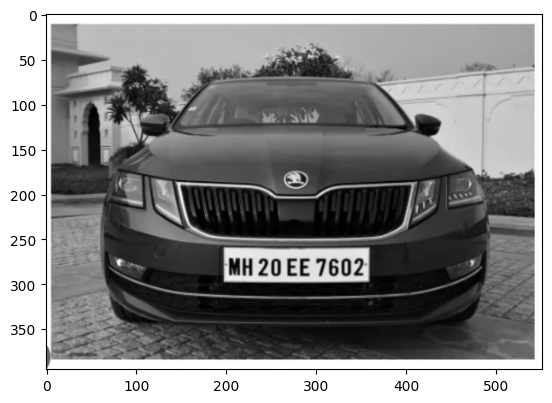

In [70]:
img=cv2.imread("img2.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))



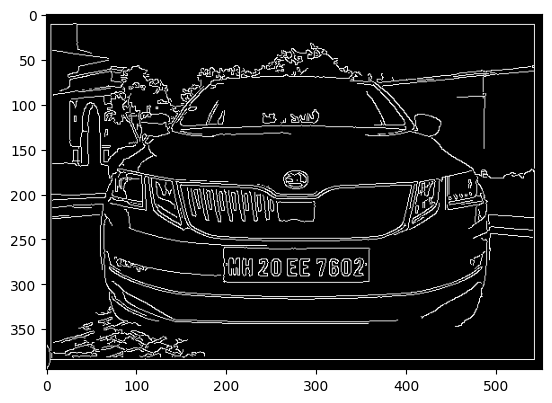

In [71]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #Noise reduction
edged=cv2.Canny(bfilter,30,200) #Edge Detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [72]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [73]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx) ==4:
        location=approx
        break

In [74]:
location

array([[[197, 261]],

       [[198, 298]],

       [[359, 297]],

       [[359, 260]]], dtype=int32)

In [75]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

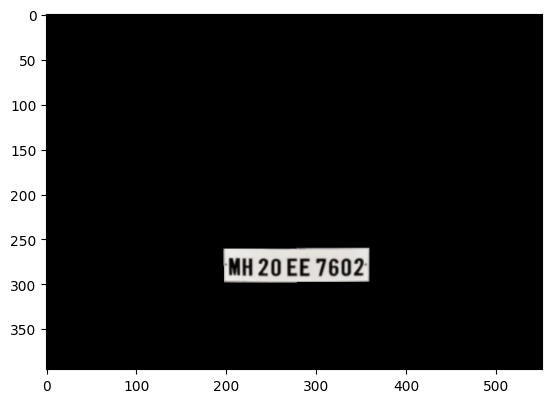

In [76]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [77]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

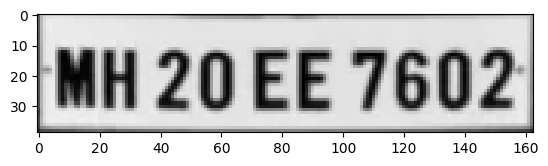

In [78]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

APPLYING OCR TO READ TEXT


In [79]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(2), np.int32(8)],
   [163, np.int32(8)],
   [163, np.int32(38)],
   [np.int32(2), np.int32(38)]],
  'MH 20 EE 7602',
  np.float64(0.6525449778690972))]

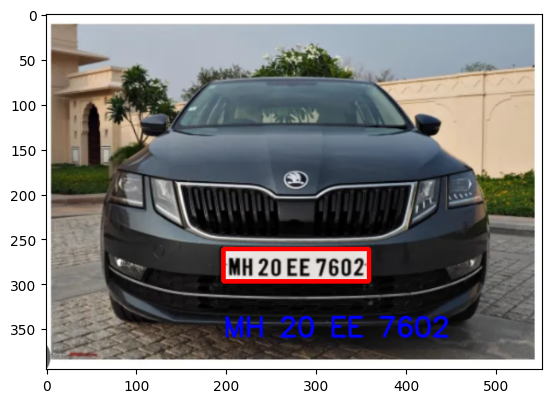

In [80]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(255,0,0),thickness=2,lineType=cv2.LINE_AA)
res=cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,0,255),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
